#  Top 5 european football leagues & Teams analysis
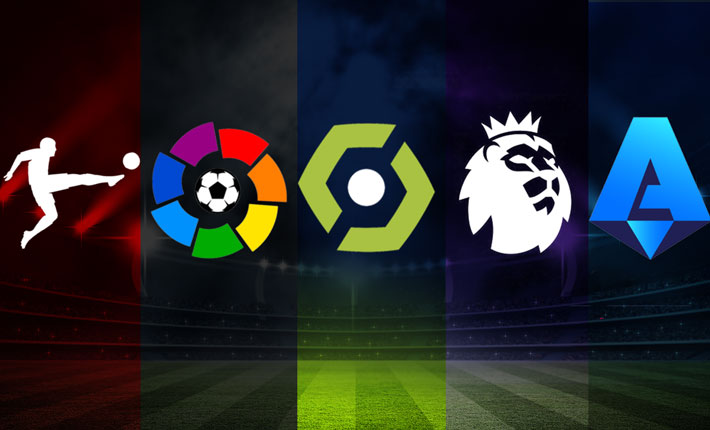

"The Top 5 European Football Leagues Analysis project uses data from Kaggle to examine the domestic football (soccer) leagues of the top 5 European countries. The data set does not include European competitions such as the UEFA Champions League and Europa League. The goal of this project is to analyze and understand various aspects of the domestic football leagues, including team performance, player statistics, and league trends."

Domestic football leagues in Europe are structured in a pyramid-like system, where teams are grouped into different tiers based on their level of skill and competitiveness. At the top of the pyramid is the first tier, also known as the top flight or the top division, which is where the best teams in the country compete against each other.

Below the top tier, there are usually one or two lower divisions, where teams that were relegated from the top tier, as well as teams that have not yet been promoted, compete against each other. The number of teams in each division varies from country to country, but it typically ranges from 20 to 24 teams.

In addition to these domestic leagues, there are also international competitions, such as the UEFA Champions League and the UEFA Europa League, which allow teams from different countries to compete against each other.

## Downloading the Dataset

In this section, the dataset is downloaded from a Kaggle URL using the opendatasets library. The dataset is then extracted and saved to the local directory './big-5-european-football-leagues-stats'. The list of files within the dataset is then printed using the os library's listdir() function. Finally, the name of the project is defined as a string variable.

## The data is for 11 seasons of football(from 2010-2011 to 2020-2021 included)

The columns contains stats of teams season by season and can be used to analyze performance of teams over the years.It consists of name of the team/club,games played,number of wins,number of losses,number of draws,points accumulated and other relevant football stats.

Let's begin by downloading the data.

## Data Preparation and Cleaning

In this cell, the pandas library is imported and used to read the 'Big 5 European football leagues teams stats.csv' file into a dataframe called 'teams_df'. The head() function is then used to print the first 5 rows of the dataframe. The shape and columns of the dataframe are also printed. It is noted that some of the columns, such as 'goals_for', 'games_starts', 'games_complete', and 'unused_subs', are deemed unnecessary and have a high percentage of null values. The drop() function is used to remove these columns from the dataframe. Null values in the dataframe are also replaced with zeros using the fillna() function. The head() function is used again to print the first 7 rows of the modified dataframe.

In [1]:
import pandas as pd
import numpy as np

In [8]:
teams_df = pd.read_csv("Big 5 European football leagues teams stats.csv")

In [9]:
teams_df.head(5)

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_complete,games_subs,unused_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,...,3.0,139,102,15,218,418,NaN,99,NaN,2.11
1,Premier League,2010-2011,2,Chelsea,38,21,8,9,69,33,...,1.0,148,115,15,241,418,NaN,107,NaN,1.87
2,Premier League,2010-2011,3,Manchester City,38,21,8,9,60,33,...,5.0,153,120,18,182,418,NaN,102,NaN,1.87
3,Premier League,2010-2011,4,Arsenal,38,19,11,8,72,43,...,6.0,150,106,13,243,418,NaN,107,NaN,1.79
4,Premier League,2010-2011,5,Tottenham,38,16,14,8,55,46,...,2.0,183,137,8,202,418,NaN,96,NaN,1.63


In [10]:
teams_df.shape

(1078, 28)

In [11]:
teams_df.columns

Index(['competition', 'season', 'rank', 'squad', 'games', 'wins', 'draws',
       'losses', 'goals_for', 'goals_against', 'goal_diff', 'points', 'notes',
       'players_used', 'assists', 'pens_made', 'pens_att', 'cards_yellow',
       'cards_red', 'shots_on_target_against', 'saves', 'clean_sheets',
       'shots_on_target', 'games_starts', 'games_complete', 'games_subs',
       'unused_subs', 'points_per_match'],
      dtype='object')

Here I can see some useless columns according to initial approach I have in my mind so, we can just simply drop those columns. Using pandas .drop functiion

In [12]:
teams_df.drop(['games_starts','games_complete','unused_subs'], axis=1, inplace=True)

In [13]:
teams_df.head(7)

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,pens_made,pens_att,cards_yellow,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,...,3,5,56.0,3.0,139,102,15,218,99,2.11
1,Premier League,2010-2011,2,Chelsea,38,21,8,9,69,33,...,6,8,59.0,1.0,148,115,15,241,107,1.87
2,Premier League,2010-2011,3,Manchester City,38,21,8,9,60,33,...,8,9,71.0,5.0,153,120,18,182,102,1.87
3,Premier League,2010-2011,4,Arsenal,38,19,11,8,72,43,...,4,7,65.0,6.0,150,106,13,243,107,1.79
4,Premier League,2010-2011,5,Tottenham,38,16,14,8,55,46,...,5,5,50.0,2.0,183,137,8,202,96,1.63
5,Premier League,2010-2011,6,Liverpool,38,17,7,14,59,44,...,7,8,63.0,2.0,149,105,14,204,93,1.53
6,Premier League,2010-2011,7,Everton,38,13,15,10,51,45,...,3,4,56.0,5.0,153,108,9,192,106,1.42


In [14]:
teams_df.drop('notes', axis=1, inplace=True)

In [15]:
null_columns = teams_df.columns[teams_df.isnull().any()]
null_columns

Index(['cards_yellow', 'cards_red'], dtype='object')

There are not many columns with null values so I just replace those values values with 0 .

In [16]:
teams_df.loc[:, ['cards_yellow', 'cards_red']].fillna(0, inplace=True)


In [17]:
teams_df.columns

Index(['competition', 'season', 'rank', 'squad', 'games', 'wins', 'draws',
       'losses', 'goals_for', 'goals_against', 'goal_diff', 'points',
       'players_used', 'assists', 'pens_made', 'pens_att', 'cards_yellow',
       'cards_red', 'shots_on_target_against', 'saves', 'clean_sheets',
       'shots_on_target', 'games_subs', 'points_per_match'],
      dtype='object')

## Exploratory Analysis and Visualization
In this cell, the seaborn library is installed using the !pip install command. The seaborn and matplotlib libraries are then imported, and the matplotlib library is used to set the default style for plots. The '%matplotlib inline' magic command is used to display plots within the Jupyter Notebook. The teams_df dataframe is then grouped by competition and season, and the mean of the points column is calculated and stored in a new dataframe called 'points_df'. The head() function is used to print the first 5 rows of the points_df dataframe. A barplot is then created using the seaborn library's barplot() function, with the x-axis representing the competition and the y-axis representing the mean points. The plot is displayed using the show() function from the matplotlib library.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
!pip install seaborn

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - let's find out those years or number of seasons about those we have data inside data frame and names of those 5 leagues we have been talking about

In [24]:
teams_df.season.unique()
#len(teams_df.season.unique())

array(['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015',
       '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020',
       '2020-2021'], dtype=object)

In [25]:
leagues_names = teams_df.competition.unique()
leagues_names

array(['Premier League', 'Ligue 1', 'Fußball-Bundesliga', 'Serie A',
       'La Liga'], dtype=object)

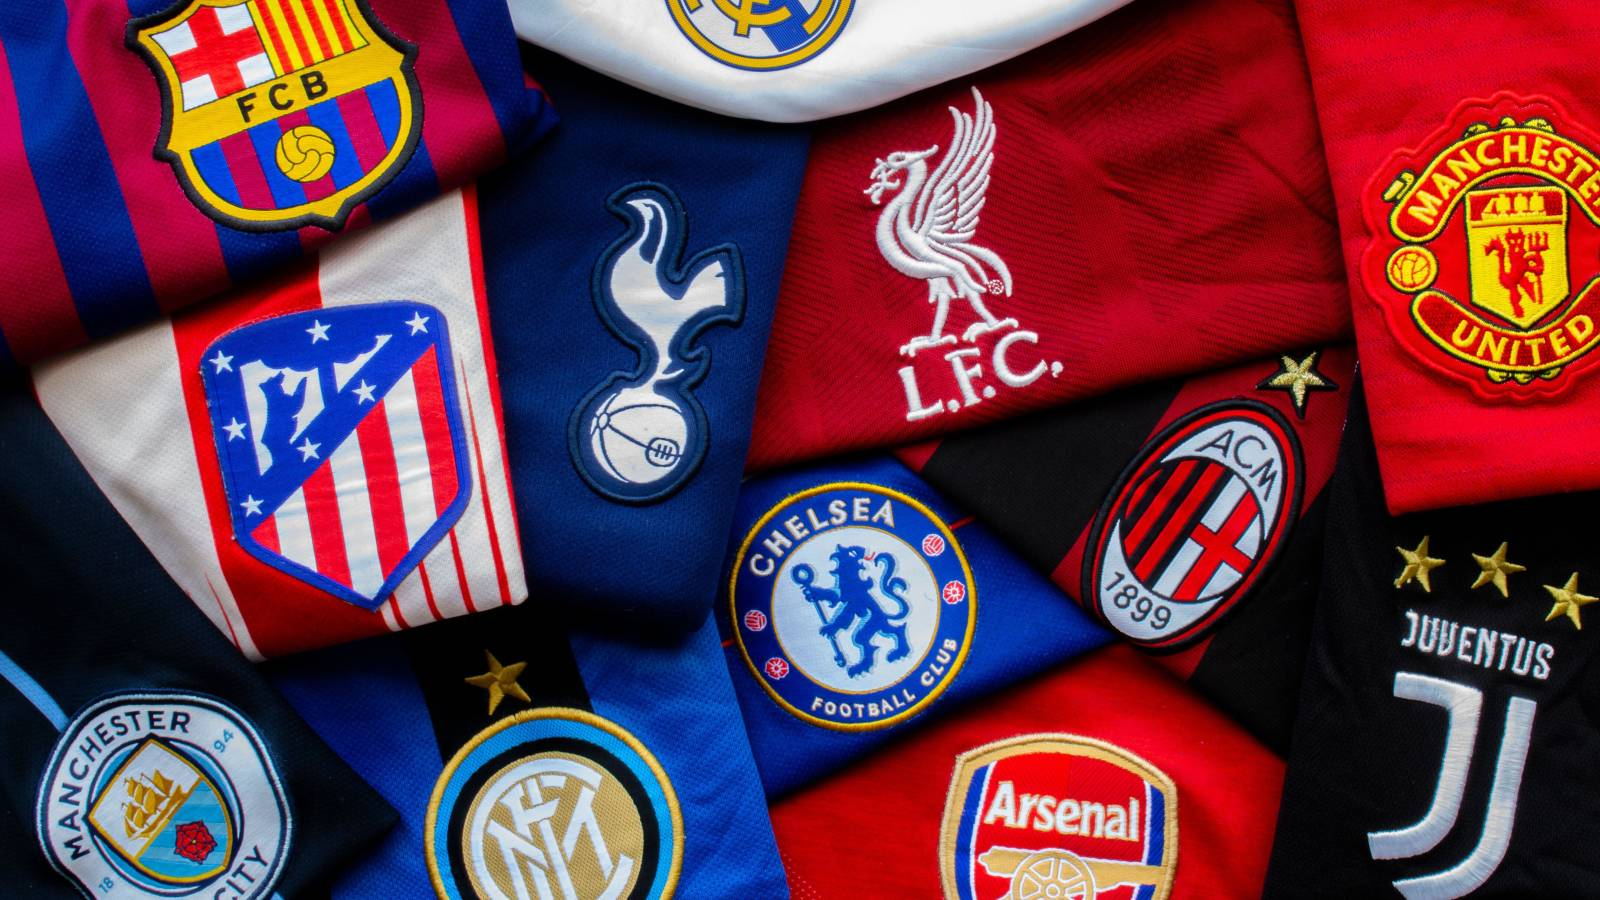

**TODO** - Let's create a new data frame that has information about the teams who have won thier respective leagues during seasons 2010-2011 to 2020-2021 ( both inclusive )

In [26]:
winners = teams_df[teams_df['rank'] == 1]
winners

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,pens_made,pens_att,cards_yellow,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,...,3,5,56.0,3.0,139,102,15,218,99,2.11
20,Premier League,2011-2012,1,Manchester City,38,28,5,5,93,29,...,7,8,51.0,5.0,133,104,17,262,110,2.34
40,Premier League,2012-2013,1,Manchester Utd,38,28,5,5,86,43,...,4,7,57.0,1.0,152,109,13,243,100,2.34
60,Premier League,2013-2014,1,Manchester City,38,27,5,6,102,37,...,6,7,0.0,0.0,126,89,16,239,108,2.26
80,Premier League,2014-2015,1,Chelsea,38,26,9,3,73,32,...,4,5,0.0,0.0,121,89,17,209,113,2.29
100,Premier League,2015-2016,1,Leicester City,38,23,12,3,68,36,...,10,13,0.0,0.0,136,100,15,179,109,2.13
120,Premier League,2016-2017,1,Chelsea,38,30,3,5,85,33,...,2,4,0.0,0.0,105,72,16,205,114,2.45
140,Premier League,2017-2018,1,Manchester City,38,32,4,2,106,27,...,6,8,NaN,NaN,82,56,18,255,106,2.63
160,Premier League,2018-2019,1,Manchester City,38,32,2,4,95,23,...,3,4,44.0,1.0,76,57,20,249,108,2.58
180,Premier League,2019-2020,1,Liverpool,38,32,3,3,85,33,...,5,5,38.0,1.0,107,75,15,222,127,2.61


**TODO** - plot a graph to show Number of Times Each Team Won the League

<Axes: title={'center': 'Number of Times Each Team Won the League'}, xlabel='squad'>

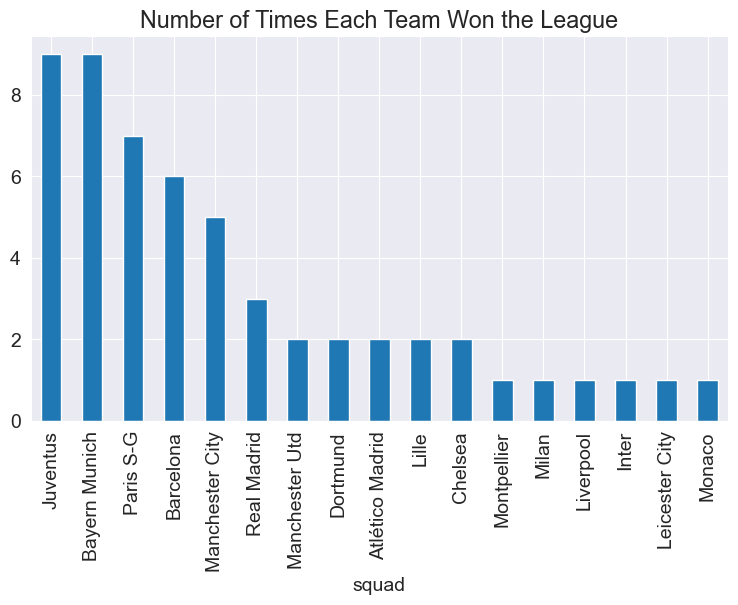

In [27]:
winners['squad'].value_counts().plot(kind='bar', x='squad', y='count', title='Number of Times Each Team Won the League')

Above graph shows the top teams those who have won leagues in each of the season we have data in our data frame and on x-axis we have name of each teams who wins league tittle in any of 11 seasons and on y-axis we have count of league titles each team have won during the past 11 seasons. This give us a lot of information like it shows us teams who dominated thier leagues in past 11 years and on the other hand it shows us that if a like in our case juventus and bayern have been dominating their leagues very much so it shows us how less competative their leagues are

**TODO** - Now let's plot a graph to check how many different league winners a single league has had during the years this will tell us how competative a cometition is

<Axes: title={'center': 'Number of Winners in Each League'}, xlabel='competition'>

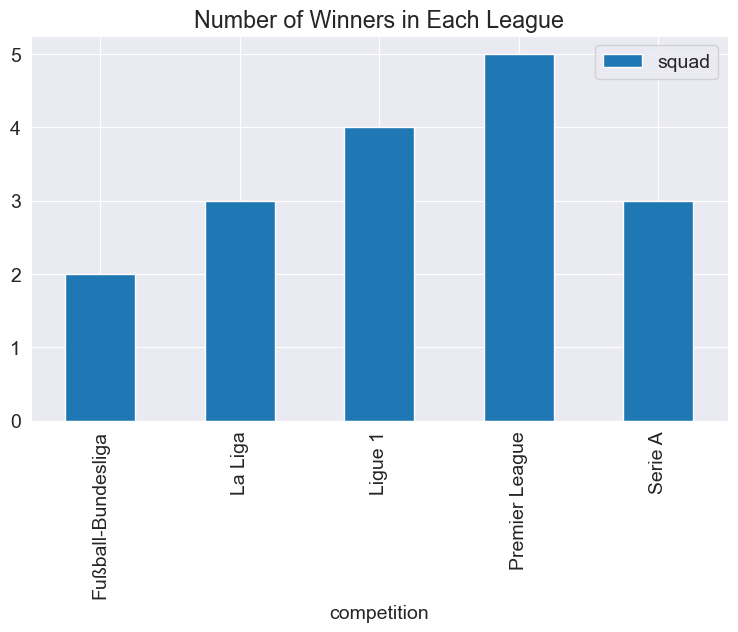

In [28]:
winner_counts = winners.groupby('competition')['squad'].nunique().reset_index()

# Plot the counts as a bar chart
winner_counts.plot(kind='bar', x='competition', y='squad', title='Number of Winners in Each League')

So, as we have discussed in our previous analysis (graph) that if a team has only one winner who wins 90% of the times it may be because of the the league those teams play in are very much less competative if a league have more teams as winners so that it may mean that the league is more competative as many different teams as competeting for the title. Above graph shows how many different teams have won the title in recent seasons on x-axis we have leagues and on y-axis we have number of winners in recent 11 seasons and it shows that premier league is the most competaive team followed by laliga

In [29]:
winners.columns


Index(['competition', 'season', 'rank', 'squad', 'games', 'wins', 'draws',
       'losses', 'goals_for', 'goals_against', 'goal_diff', 'points',
       'players_used', 'assists', 'pens_made', 'pens_att', 'cards_yellow',
       'cards_red', 'shots_on_target_against', 'saves', 'clean_sheets',
       'shots_on_target', 'games_subs', 'points_per_match'],
      dtype='object')

Let us save and upload our work to Jovian before continuing

**TODO** - Let's check out different information about data frame like null values inside it and and d type of all the columns to better understanding of all our data set

In [30]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   competition              1078 non-null   object 
 1   season                   1078 non-null   object 
 2   rank                     1078 non-null   int64  
 3   squad                    1078 non-null   object 
 4   games                    1078 non-null   int64  
 5   wins                     1078 non-null   int64  
 6   draws                    1078 non-null   int64  
 7   losses                   1078 non-null   int64  
 8   goals_for                1078 non-null   int64  
 9   goals_against            1078 non-null   int64  
 10  goal_diff                1078 non-null   int64  
 11  points                   1078 non-null   int64  
 12  players_used             1078 non-null   int64  
 13  assists                  1078 non-null   int64  
 14  pens_made               

In [31]:
teams_df.describe()

,rank,games,wins,draws,losses,goals_for,goals_against,goal_diff,points,players_used,...,pens_made,pens_att,cards_yellow,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_subs,points_per_match
count,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,...,1078.000000,1078.000000,985.000000,985.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000
mean,10.316327,37.077922,13.867347,9.343228,13.867347,50.611317,50.611317,0.000000,50.913729,27.867347,...,4.314471,5.545455,48.448731,2.728934,160.691095,112.125232,10.269944,164.905380,109.913729,1.373302
std,5.680370,1.996621,5.858596,2.990701,5.363658,16.774271,12.677565,25.632355,16.706516,3.277909,...,2.495380,2.904751,40.132120,2.703247,31.489075,22.682912,3.890140,40.260807,16.508769,0.443553
min,1.000000,27.000000,2.000000,2.000000,0.000000,20.000000,17.000000,-61.000000,13.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,71.000000,45.000000,2.000000,77.000000,71.000000,0.420000
25%,5.000000,38.000000,10.000000,7.000000,10.000000,39.000000,42.000000,-17.000000,40.000000,25.000000,...,3.000000,3.000000,0.000000,0.000000,139.000000,97.000000,8.000000,137.000000,101.000000,1.080000
50%,10.000000,38.000000,12.000000,9.000000,14.000000,47.000000,51.000000,-5.000000,47.000000,28.000000,...,4.000000,5.000000,59.000000,2.000000,162.000000,111.000000,10.000000,157.000000,109.000000,1.260000
75%,15.000000,38.000000,17.000000,11.000000,18.000000,59.000000,58.750000,13.750000,61.000000,30.000000,...,6.000000,7.000000,79.000000,4.000000,180.750000,126.000000,13.000000,186.000000,113.000000,1.630000
max,20.000000,38.000000,33.000000,19.000000,29.000000,121.000000,94.000000,89.000000,102.000000,42.000000,...,15.000000,20.000000,150.000000,12.000000,271.000000,199.000000,24.000000,318.000000,189.000000,2.680000


## Asking and Answering Questions



#### Q1: TODO - Which are the top 10 teams with the best offensive performance among the league-winning teams over the last 11 years, when sorted on the basis of their offensive performance?

<Axes: xlabel='squad,season'>

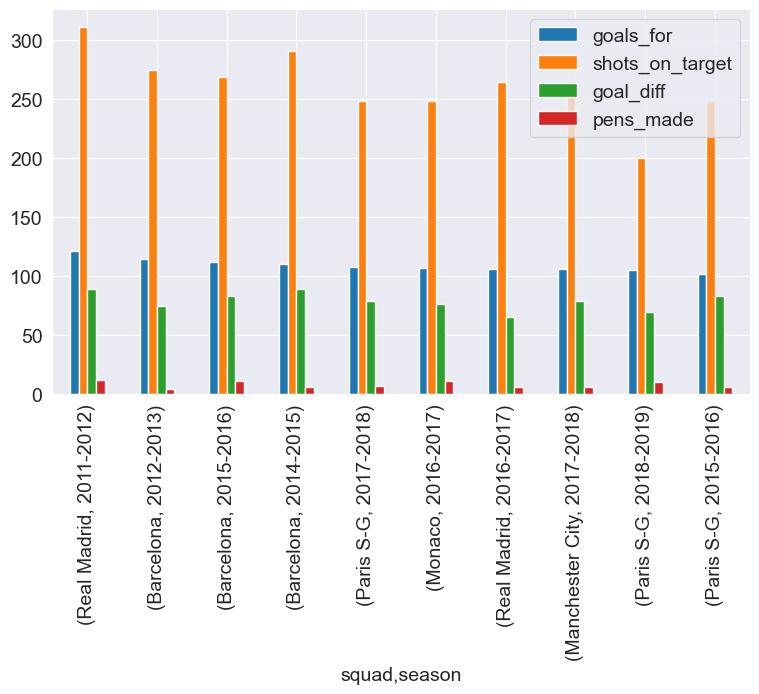

In [33]:
top_offensive_teams = winners.sort_values(by=['goals_for','shots_on_target','goal_diff','pens_made'],ascending=[False,False,False,True]).head(10).reset_index()
top_offensive = top_offensive_teams.loc[:,['squad','season','goals_for','shots_on_target','goal_diff','pens_made']].set_index(['squad','season'])

top_offensive.plot(kind='bar', stacked=False)


as the question says we hve to find out top teams not form single league but from all these leagues so we decided some columns that involes in offensive columns and then take top ten out of them and plot them into the graph

#### Q2: TODO - Which are the top teams with the best defensive performance among the league-winning teams over the last 11 years, when sorted on the basis of their defensive performance?

<Axes: ylabel='squad,season'>

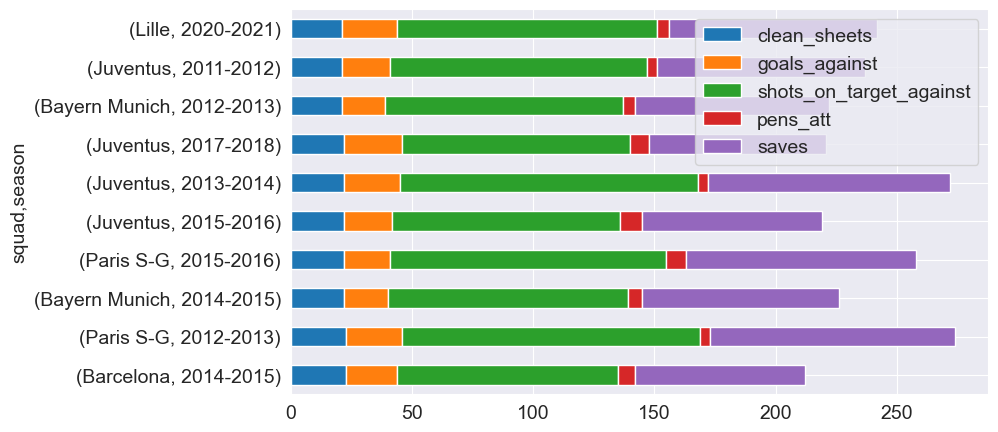

In [34]:
top_defensive_teams = winners.sort_values(by=['clean_sheets','goals_against','shots_on_target_against','pens_att','saves'],ascending=[False,True,True,True,False]).head(10).reset_index()
top_defensive = top_defensive_teams.loc[:,['squad','season','clean_sheets','goals_against','shots_on_target_against','pens_att','saves']].set_index(['squad','season'])

top_defensive.plot(kind='barh', stacked=True)


This question ask us to filter out top teams with the best defensive recods so we have approached this question same way as the previous one

In [ ]:
data.shape

In [ ]:
data_df = data.drop_duplicates(subset="squad")
data_df.shape

Question says that we have to create a new data frame by combining all those squads we have created previously on the basis of their offensive and defensive and overall ratings 

# Summary and Conclusion & References and Future Work

# Summary:

1- The data set includes information about the top 5 European football leagues from 2010-2011 to 2020-2021.

2- The data frame was cleaned using different approaches and null values were replaced with zeros.

3- Some basic statistics and visualizations were generated to understand the distribution of various metrics among the teams.

4- The top teams in terms of offensive, defensive, and overall performance over the last 11 years were identified and compared.

5- A heat map was created to visualize the ranks of each team across seasons.

# Possible conclusions based on the analysis:

1- The distribution of metrics such as wins, goals scored, and points varies significantly among the teams.

2- There are some teams that consistently perform well in all categories, while others may excel in some areas but struggle in others.

3- For some leagues the rankings of teams can change significantly from season to season, as illustrated by the heat map.

4- Further analysis and modeling may be needed to identify the factors that contribute to a team's success and predict their performance in future seasons.